# Test Classifiers and Regressors on train / test data set

In [1]:
import operator
import numpy as np
import math
import pandas as pd
import ipywidgets as widgets
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score,cross_val_predict, train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC,SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score,roc_curve, auc, get_scorer, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy.stats import spearmanr, pearsonr
from matplotlib import pyplot 
from sklearn import linear_model,neighbors,tree,gaussian_process,ensemble,neural_network, manifold

## Parameters

In [2]:
rel = "../"
train_data_file = rel+"target/features-train.csv"
sep = ','
threshold = 0.5
cv_fold=StratifiedKFold(n_splits=3)

## Classifiers to test

In [3]:
classifiers = [
    SVC(kernel="rbf", C=0.025, probability = True),
    SVC(kernel="linear", C=0.025, probability = True),
    SVC(gamma=2, C=1, probability = True,decision_function_shape ='ovr'),
    KNeighborsClassifier(3),
    KNeighborsClassifier(5),
    KNeighborsClassifier(7),
    DecisionTreeClassifier(max_depth=5,max_features=5),
    DecisionTreeClassifier(max_depth=10,max_features=5),
    DecisionTreeClassifier(max_depth=15,max_features=5),
    RandomForestClassifier(max_depth=5, n_estimators=10),
    RandomForestClassifier(max_depth=10, n_estimators=10),
    RandomForestClassifier(max_depth=15, n_estimators=10),
    RandomForestClassifier(max_depth=15, n_estimators=20),
    RandomForestClassifier(max_depth=15, n_estimators=30),
    RandomForestClassifier(n_estimators=30),
    AdaBoostClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    neural_network.MLPClassifier(activation='logistic',solver='lbfgs',max_iter=200)
]



## Regressors to test

In [4]:
regressors = [
    SVR(kernel="rbf", C=0.025),
    SVR(kernel="linear", C=0.025),
    SVR(gamma=2, C=1),
    linear_model.LinearRegression(),
    linear_model.Ridge(alpha = .5),
    linear_model.ElasticNet(),
    linear_model.BayesianRidge(),
    ensemble.RandomForestRegressor(),
    ensemble.GradientBoostingRegressor(),
    ensemble.ExtraTreesRegressor(),
    ensemble.BaggingRegressor(),
    ensemble.AdaBoostRegressor(),
    gaussian_process.GaussianProcessRegressor(),
    linear_model.HuberRegressor(),
    linear_model.PassiveAggressiveRegressor(),
    #linear_model.RANSACRegressor(residual_threshold=0.02),
    linear_model.TheilSenRegressor(),
    linear_model.SGDRegressor(),
    neighbors.KNeighborsRegressor(),
    tree.DecisionTreeRegressor(),
    tree.ExtraTreeRegressor(),
    neural_network.MLPRegressor()
    
]

## Load data

In [5]:
def parse(data_file, sep):
    data = np.genfromtxt(data_file, delimiter=sep)  # Load data from csv
    data = data[1:,]
    #data = data[~np.isnan(data).any(axis=1)] #Drop NANS
    x = data[:, :-1]  # Obtain labels from data
    y = np.array(data[:, -1], dtype=np.dtype(np.int16))
    return x,y

In [6]:
x_train,y_train = parse(train_data_file,sep=sep)

In [7]:
y_train

array([1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0,

In [8]:
train_pd = pd.DataFrame(x_train)
train_pd.head()

,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,166
0,63.0,1.0,0.270006,238.096175,0.785493,7.069741,0.519621,0.577098,0.012593,106.222222,...,28.278799,-0.443347,19.538462,22.264758,18.175313,33.737925,40.337835,42.944857,0.634094,7.804558
1,67.0,2.0,0.324528,111.296400,0.861909,4.695538,0.569673,0.624340,0.011852,139.955556,...,24.866574,0.018879,10.987928,17.142019,9.028840,30.706573,39.965392,45.156975,0.553380,10.678461
2,61.0,1.0,0.271143,190.308211,0.863498,6.624297,0.520714,0.573309,0.030864,334.288889,...,31.700592,-0.073790,18.476980,22.453039,16.939180,40.023711,48.309116,57.185083,0.777455,12.195809
3,61.0,1.0,0.281700,181.636295,0.821772,6.475441,0.530754,0.580574,0.012099,175.022222,...,44.155304,0.313876,30.978177,39.497468,26.657136,50.285451,54.261510,56.021501,-0.777199,8.753685
4,70.0,3.0,0.205839,184.092051,0.867989,6.410386,0.453695,0.526343,0.011358,54.300000,...,19.798736,0.012891,14.852977,16.916246,13.449697,22.170535,24.733602,26.156105,0.260199,3.960624


# Represent data

### Roc curve generator

In [9]:
def roc_auc_score(y_test,y_score):
    fpr, tpr, _ = roc_curve(y_test, y_score)
    return auc(fpr, tpr)

In [10]:
def plot_roc_curve(y_test, y_score):
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    pyplot.figure()
    lw = 2
    pyplot.plot(fpr["micro"],tpr["micro"], color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc["micro"])
    pyplot.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    pyplot.xlim([0.0, 1.0])
    pyplot.ylim([0.0, 1.05])
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    pyplot.title('Receiver operating characteristic')
    pyplot.legend(loc="lower right")
    pyplot.show()

## Score classifiers

In [11]:
classifiers_scores = []
classifiers_predictions = []
# iterate over classifiers
for clf in classifiers:
    y_score = cross_val_predict(clf, x_train,y_train, cv=cv_fold,method='predict_proba')
    classifiers_scores.append(roc_auc_score(y_train,y_score[:,1]))
    classifiers_predictions.append(y_score)

D:\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
D:\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
D:\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [12]:
classifiers = [cls for score, cls in sorted(zip(classifiers_scores,classifiers),key=operator.itemgetter(0), reverse=True)]
classifiers_predictions = [cls for score, cls in sorted(zip(classifiers_scores,classifiers_predictions),key=operator.itemgetter(0), reverse=True)]

## The best classifier

In [13]:
from sklearn.metrics import *
def showClassifier(idx,classifiers,predictions):
    print(idx)
    cls = classifiers[idx]
    print(cls)
    y_score = predictions[idx]
    y_score_bin = y_score[:,1] > 0.5   
    print(classification_report(y_train, y_score_bin ))
    plot_roc_curve(y_train,y_score[:,1])


0
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
             precision    recall  f1-score   support

          0       0.79      0.96      0.87       246
          1       0.54      0.17      0.26        75

avg / total       0.73      0.77      0.72       321



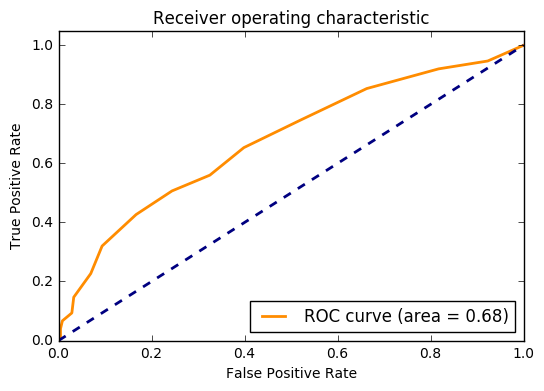

<function __main__.showClassifier>

In [14]:
class_id = widgets.Dropdown(
    options=[(type(cls).__name__ +' - '+str(idx+1),idx) for idx,cls in enumerate(classifiers)],
    description='Classifier:'
)

widgets.interact(showClassifier,idx=class_id,classifiers=widgets.fixed(classifiers),predictions=widgets.fixed(classifiers_predictions))

## Score regressors

## The best regressor